In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('Dataset12.csv')

In [7]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


In [9]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


In [11]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Crop                                    0
Precipitation (mm day-1)                0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Temperature at 2 Meters (C)             0
Yield                                   0
dtype: int64


In [13]:
df = df.dropna()

In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [49]:
target_column = 'Crop'
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")


In [55]:
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

In [57]:
df_encoded = pd.get_dummies(df.drop(target_column, axis=1), drop_first=True)
X = df_encoded
y = df[target_column]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [69]:
y_pred = model.predict(X_test_scaled)

In [71]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                 precision    recall  f1-score   support

   Cocoa, beans       0.25      0.11      0.15         9
 Oil palm fruit       1.00      1.00      1.00         6
    Rice, paddy       1.00      1.00      1.00        11
Rubber, natural       0.27      0.50      0.35         6

       accuracy                           0.66        32
      macro avg       0.63      0.65      0.63        32
   weighted avg       0.65      0.66      0.64        32



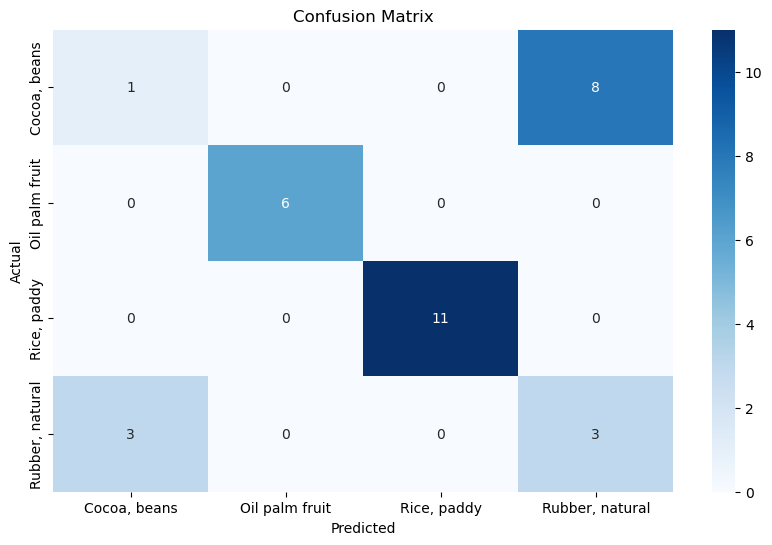

In [73]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()